<a href="https://colab.research.google.com/github/INISHKASHYAP/OptiFleet_Collab/blob/main/OptiFleet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.9 MB/s eta 0:00:00


gen	nevals	avg    	min    
0  	300   	569.399	1.24391
1  	213   	544.972	2.55978
2  	243   	543.143	5.45891
3  	232   	531.682	1.55955
4  	233   	529.098	2.47231
5  	218   	517.726	2.47231
6  	213   	508.028	4.67708
7  	233   	511.173	2.05752
8  	219   	502.474	1.56632
9  	209   	491.807	1.56632
10 	224   	486.715	3.69489
11 	230   	489.223	3.60037
12 	230   	479.39 	3.60037
13 	217   	458.296	3.60037
14 	231   	446.711	1.67433
15 	250   	435.516	3.96402
16 	238   	417.826	4.74375
17 	236   	403.704	9.35238
18 	225   	391.191	3.11006
19 	225   	381.448	6.04272
20 	209   	369.321	6.55372
21 	232   	370.899	3.41682
22 	237   	363.132	4.96633
23 	217   	361.581	6.95218
24 	227   	364.268	2.83279
25 	246   	360.875	4.31648
26 	233   	350.843	4.31648
27 	219   	349.514	8.85143
28 	229   	342.692	11.753 
29 	223   	338.115	9.12182
30 	238   	340.016	6.94139
31 	225   	329.322	9.21281
32 	221   	325.713	11.2371
33 	243   	310.047	6.79747
34 	232   	293.746	8.49234
35 	244   	282.291	8.49234
3

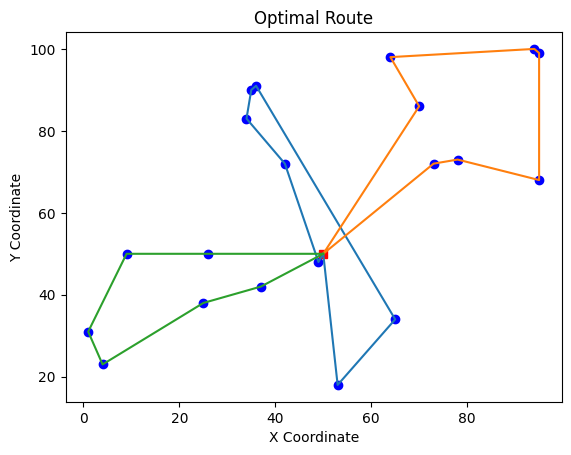

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# We have taken data below just for visualization where depot is the central point
# Here we are defining the number of locations and vehicles
num_locations = 20  # We define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # This function generates random (x, y) coordinates for each location
depot = (50, 50)  # Here we define the central depot location as a fixed point
num_vehicles = 3  # Here we define how many vehicles are available to visit the locations

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # we define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Here we define individual structure. Individuals are lists with a fitness attribute.

# Finishing setting up the individuals and population
# toolbox is an object used to store and manage various evolutionary algorithm components
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals

# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Here we calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Here we are using standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)  # Registering the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Registering the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Registering the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Registering the selection function using tournament selection

# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Let us plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Drawing routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generating initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Seting up statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Running the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plotting the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()